In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('Churn_Modelling.csv.xls')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [20]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [21]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [30]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [42]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [44]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)
# here what the validation_split ... since we know on each epoch we run through the whole dataset once ... validation_split splits the data into 80-20
    # and then on each epoch it provides the accuracy score

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.8659 - loss: 0.3166 - val_accuracy: 0.8575 - val_loss: 0.3624
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.8785 - loss: 0.3044 - val_accuracy: 0.8587 - val_loss: 0.3616
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.8768 - loss: 0.2994 - val_accuracy: 0.8575 - val_loss: 0.3607
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.8741 - loss: 0.2994 - val_accuracy: 0.8556 - val_loss: 0.3618
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.8725 - loss: 0.3073 - val_accuracy: 0.8569 - val_loss: 0.3617
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.8744 - loss: 0.3018 - val_accuracy: 0.8594 - val_loss: 0.3599
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8728 - loss: 0.3106 - val_accuracy: 0.8587 - val_loss: 0.3603
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.8772 - loss: 0

In [67]:
model.layers[0].get_weights()

[array([[-0.12629776, -0.34235638,  0.27226937,  0.0626542 , -0.06328075,
          0.00531721,  0.41116878,  0.10679421,  0.09975915, -0.11423382,
         -0.03727996],
        [ 0.29098195, -0.68254197, -0.00567772,  0.4616871 ,  1.1171439 ,
          0.1385215 ,  0.6610496 ,  0.13891686, -0.2854864 ,  0.07579741,
          1.2278863 ],
        [ 0.19792046,  0.33544913, -0.5779581 ,  0.08005916, -0.30799907,
         -0.08931738,  0.5311282 , -0.11822811,  0.22162183, -0.25513196,
          0.02715714],
        [-1.1593994 , -0.754543  ,  0.5302729 , -0.39744133, -0.1031049 ,
          0.07693326, -0.5603099 , -0.0298471 , -1.2669017 , -0.16064522,
         -0.21019904],
        [-1.0389749 , -0.05013023, -0.05438265, -0.5275058 , -0.07010035,
          0.39383137,  0.11101878,  1.4268099 , -0.23903762,  0.18621328,
         -0.01664126],
        [-0.07307027,  0.28726128,  0.39604753,  0.2690467 , -0.07283891,
          0.23146562, -0.0120258 ,  0.17749976, -0.07347072, -0.4757982

In [68]:
model.layers[2].get_weights()

[array([[ 1.4243125 ],
        [ 1.0540447 ],
        [ 0.71871996],
        [-0.95689255],
        [ 1.9565296 ],
        [-1.015693  ],
        [ 0.6962824 ],
        [ 0.4851472 ],
        [ 0.40718508],
        [-1.3106184 ],
        [-0.56178886]], dtype=float32),
 array([0.12913656], dtype=float32)]

In [69]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step


In [70]:
# now we need to fix a thresold to predict it as 0 or 1
import numpy as np
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [71]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.854

In [79]:
import matplotlib.pyplot as plt

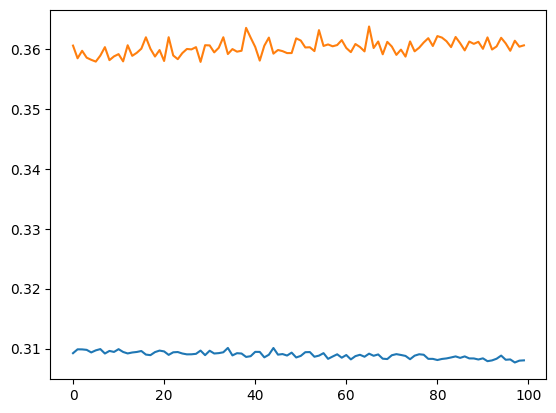

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

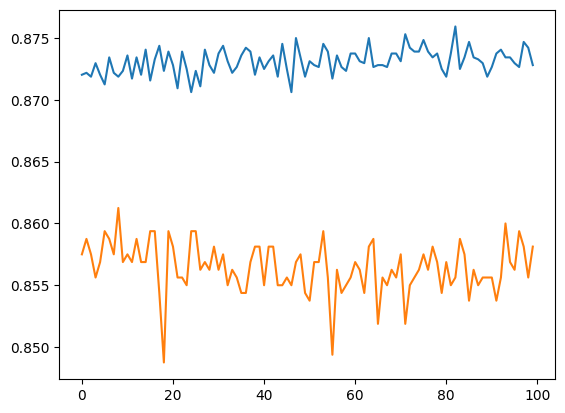

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])